# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [81]:
# import numpy and pandas
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [3]:
# Run this code:

salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [4]:
# Your code here:
print(salaries.shape)
salaries.head()

(33183, 8)


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [5]:
# Your code here:
percent_missing = salaries.isnull().sum() * 100 / len(salaries)
missing_value_df = pd.DataFrame({'column_name': salaries.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Name,Name,0.000000
Job Titles,Job Titles,0.000000
Department,Department,0.000000
Full or Part-Time,Full or Part-Time,0.000000
Salary or Hourly,Salary or Hourly,0.000000
Typical Hours,Typical Hours,75.824971
Annual Salary,Annual Salary,24.175029
Hourly Rate,Hourly Rate,75.824971


Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [6]:
# Your code here:
salaries.groupby('Salary or Hourly').count()

,Name,Job Titles,Department,Full or Part-Time,Typical Hours,Annual Salary,Hourly Rate
Salary or Hourly,,,,,,,
Hourly,8022,8022,8022,8022,8022,0,8022
Salary,25161,25161,25161,25161,0,25161,0


What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [7]:
# Your code here:
depart = salaries.groupby('Department').count()[['Name']]
depart.T

Department,ADMIN HEARNG,ANIMAL CONTRL,AVIATION,BOARD OF ELECTION,BOARD OF ETHICS,BUDGET & MGMT,BUILDINGS,BUSINESS AFFAIRS,CITY CLERK,CITY COUNCIL,...,MAYOR'S OFFICE,OEMC,POLICE,POLICE BOARD,PROCUREMENT,PUBLIC LIBRARY,STREETS & SAN,TRANSPORTN,TREASURER,WATER MGMNT
Name,39,81,1629,107,8,46,269,171,84,411,...,85,2102,13414,2,92,1015,2198,1140,22,1879


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [9]:
checkPValue = lambda p,threshold=0.05: "--> Null(H0) hypotesis rejected" if p < threshold else "--> We cannot reject the null hypotesis"

In [10]:
# Your code here:

# H0: the mean of the hourly salaries in chicago is = 30$/h
hour_salaries = salaries.loc[salaries['Salary or Hourly'] == 'Hourly']
hours = hour_salaries['Hourly Rate'].values
res_hour = stats.ttest_1samp(hours,30)
print(res_hour, checkPValue(res_hour.pvalue))

Ttest_1sampResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92) --> Null(H0) hypotesis rejected


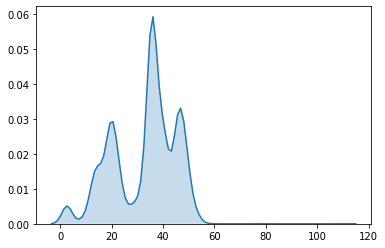

In [11]:
# REJECT H0: The average of hurly rate in Chicago sample is diffreent from 30
sns.kdeplot(hours,shade=True)

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [31]:
# Your code here:

#H0: The salaries in Chicago police this year are = 86000$
police_salaries = salaries.loc[salaries['Department'] == 'POLICE']
pol_salaries = police_salaries.dropna(subset=['Annual Salary'])
pol_sal = pol_salaries['Annual Salary']
pol_salar = stats.ttest_1samp(pol_sal,86000)

In [30]:
## REJECT H0: The salary of Chicago police is higher the year than 86000$

print(pol_salar, checkPValue((pol_salar.pvalue)/2))

Ttest_1sampResult(statistic=3.081997005712994, pvalue=0.0020603403550965137) --> Null(H0) hypotesis rejected


Using the `crosstab` function, find the department that has the most hourly workers. 

In [50]:
# Your code here:
test = pd.crosstab(salaries['Department'],salaries['Salary or Hourly'])
print(test.Hourly.idxmax(), test.Hourly.max())

STREETS & SAN 1862


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [51]:
# Your code here:
hourly_sal = salaries.loc[salaries['Department'] == 'STREETS & SAN']
hourly_sal_ss = hourly_sal.loc[hourly_sal['Salary or Hourly'] == 'Hourly']


In [55]:
# H0: The salaries of the STREETS & SAN departamnet is = 35$ hour
h_sal_ss = stats.ttest_1samp(hourly_sal_ss['Hourly Rate'],35)
print(h_sal_ss, checkPValue((h_sal_ss.pvalue)/2))

Ttest_1sampResult(statistic=-9.567447887848152, pvalue=3.3378530564707717e-21) --> Null(H0) hypotesis rejected


In [ ]:
## REJECT H0: this department is making less than 35$ hour

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [59]:
# Your code here:
hourly_wage = salaries['Hourly Rate'].dropna()
df = len(hourly_wage)-1
mean_hor = hourly_wage.mean()
sterr = stats.sem(hourly_wage)
print(df,mean_hor,sterr)

8021 32.78855771628024 0.1352368565101596


In [65]:
def conf_interval(data_series):
    mean = np.mean(data_series)
    conf_int = stats.sem(data_series) * stats.t.ppf((1 + 0.95) / 2, len(data_series) - 1)
    start = mean - conf_int
    end = mean + conf_int
    return start, end 

In [66]:
conf_interval(hourly_wage)

(32.52345834488425, 33.05365708767623)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [77]:
# Your code here:
pol_salary = salaries.loc[salaries['Department'] == 'POLICE']
police_salaries = pol_salary.loc[pol_salary['Salary or Hourly']== 'Salary']
polis_salaries = police_salaries['Annual Salary'].dropna()
conf_interval(polis_salaries)

(86177.05631531784, 86795.77269094894)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [84]:
from statsmodels.stats.proportion import proportions_ztest

In [90]:
# Your code here:
hourly = salaries.loc[salaries['Salary or Hourly'] == 'Hourly']
len(hourly)
len(salaries)
proportions_ztest(len(hourly), len(salaries), 0.25)

(-3.5099964213703005, 0.0004481127249057967)

In [ ]:
# As the p value is lwer than 0.05 we can say that the numebr of hourly workers in Chicago 
# is not significantly different from 25% at a 95